In [2]:
#-------------------------------------------------------------------------------
# Name:        module1
# Purpose:
#
# Author:      Saurabh kumar
#
# Created:     14/09/2017
# Copyright:   (c) Saurabh kumar 2017
# Licence:     <your licence>
#-------------------------------------------------------------------------------

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import scipy.io
import math as m
%matplotlib inline
import matplotlib.mlab as mlab

# 1. MLE and MAP

In [47]:
burgers = [0,1,0,0,0,2,0,1,1,0,1,0,1,1,4,0,1,5,0,0,2,1,1,2,1,3,0,0,1,2,1,0,0,1,2]
lambdaMLE = sum(burgers)/len(burgers)
print ("Lambda MLE: ",lambdaMLE)

Lambda MLE:  1.0


In [50]:
aburgers = []
for v in burgers:
    aburgers.append(m.log(m.factorial(v)))
   
sum(aburgers)

13.223040945157774

In [51]:
#lambda = 1
loglikelihood = m.log(lambdaMLE)*sum(burgers) - len(burgers)*lambdaMLE - sum(aburgers)
loglikelihood

-48.22304094515778

In [52]:
#lambda = 2
loglikelihood = m.log(2)*sum(burgers) - len(burgers)*2 - sum(aburgers)
loglikelihood

-58.9628896255597

In [53]:
#lambda = 3
loglikelihood = m.log(3)*sum(burgers) - len(burgers)*3 - sum(aburgers)
loglikelihood

-79.77161084177393

Gamma Distribution:\n k is the number of past events<\br>
θ is the number of event in one unit time\n
LambdaMAP = k - 1 + len(burgers)/(N+len(burgers)+(1/(k+len(burgers))/N+len(burgers)))
Where N = 600, k=900

In [54]:
k = 900
N = 600
θ = (k+len(burgers))/(N+len(burgers))
lambdaMAP = (k - 1 + len(burgers))/(N+len(burgers)+(1/θ))
lambdaMAP

1.4692947035466721

# 2. Central Limit Theorem 

## 2.1

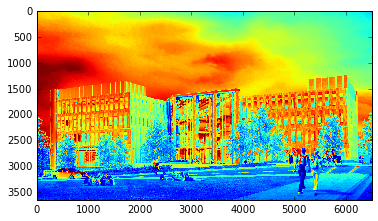

In [2]:
im = image.imread('luddy.jpg')
red = im[:,:,1]
plt.imshow(red)
plt.show()

In [3]:
red.shape

(3655, 6496)

## 2.2

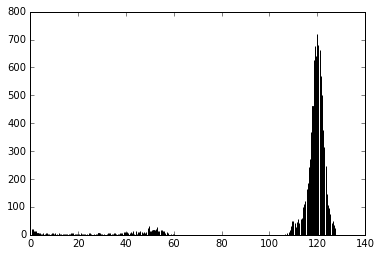

In [9]:
slice = red[5:105,200:300]
slice1 = red[3000:3100,6000:6100]

slice_sum = slice + slice1
slice_avg = slice_sum/2.0

slice_avg = slice_avg.reshape(-1)

plt.hist(slice_avg.ravel(), bins=10000)
plt.show()

## 2.3

In [5]:
slice100 = red[5:105,2005:2105]
n = 10
m = 110
x = 2010
y = 2110
for i in range(1,100):
    n+=5
    m+=5
    x+=5
    y+=5
    slice100 =  slice100 + red[n:m,x:y]

slice100_avg = slice100/100.0
slice100_avg = slice100_avg.reshape(-1)


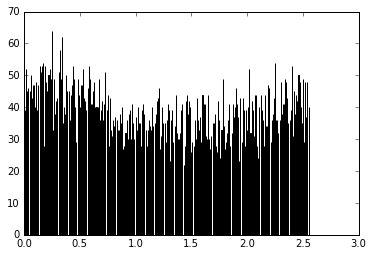

In [10]:
plt.hist(slice100_avg.ravel(), bins=10000)
plt.show()

## 2.4

In [7]:
slice1000 = red[5:105,2005:2105]
n = 10
m = 110
x = 2010
y = 2110
for i in range(1,1000):
    n+=2
    m+=2
    x+=2
    y+=2
    slice1000 =  slice1000 + red[n:m,x:y]

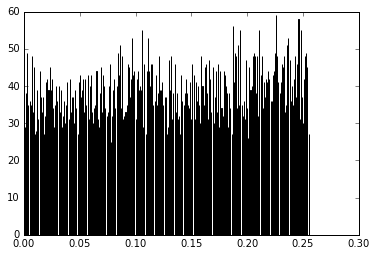

In [26]:
slice1000_avg = slice1000/1000.0
slice1000_avg = slice1000_avg.reshape(-1)
plt.hist(slice1000_avg.ravel(), bins=10000)
plt.show()

## 2.6

In [150]:
def mean(data):
    sum = 0
    for i in data:
        sum+=i
    return (sum/(data.shape[0]))
            
def variance(data, mean):
    diff = 0
    for i in data:
        d = (i-mean)**2
        diff+=d
    return (diff/(data.shape[0]))


mean1 = mean(slice_avg)
variance1 = variance(slice_avg,mean1)
print ("Mean1:", mean1 , " Variance1:" , variance1)
            
mean100 = mean(slice100_avg)
variance100 = variance(slice100_avg,mean100)
print ("Mean100:", mean100 , " Variance100:" , variance100)

mean1000 = mean(slice1000_avg)
variance1000 = variance(slice1000_avg,mean1000)
print ("Mean1000:", mean1000 , " Variance1000:" , variance1000)

Mean1: 111.92085  Variance1: 637.810560278
Mean100: 1.233934  Variance100: 0.588543423644
Mean1000: 0.1309935  Variance1000: 0.00548819905775


## 2.7

In [153]:
def log_likeli(mean, variance):
    n = 10000
    likelihood = -((n/2)* m.log(3.14)) - ((n/2)* m.log(variance)) - (n/2)
    return (likelihood)

print (log_likeli(mean1, variance1))
print (log_likeli(mean100, variance100))
print (log_likeli(mean1000, variance1000))

-43011.32055854271
-8070.591159534419
15304.661589201449


In [ ]:
def plot(mu, variance):
    sigma = m.sqrt(variance)
    x = np.linspace(mu-0.1*variance,mu+0.1*variance, 100)
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.show()


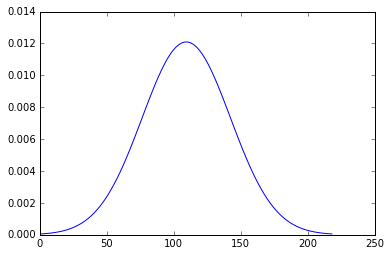

In [83]:
plot(mean1, variance1)

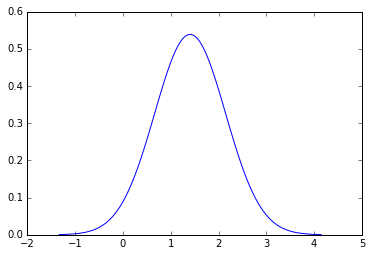

In [75]:
plot(mean100, variance100)

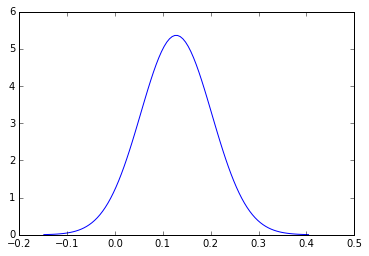

In [81]:
plot(mean1000, variance1000)

# 3. Power Iteration

## 3.1

In [2]:
#Power Iteration Routine
def powerIteration(X):
    v_i = np.random.rand(X.shape[1], 1)
    for i in range(5000):
        v_i = np.dot(X,v_i)
        v_i /= np.linalg.norm(v_i)
    return v_i  

## 3.2

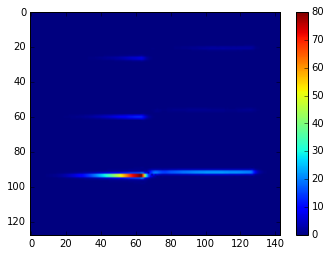

In [3]:
mat = scipy.io.loadmat('flute.mat')
plt.imshow(mat['X'])
plt.colorbar()
plt.show()

## 3.3

In [6]:
nodes = mat['X']
XT = nodes.T
covarianceMatrix = np.dot(nodes, XT)/nodes.shape[0]
covarianceMatrix.shape

(128, 128)

In [7]:
eigenVector1 = powerIteration(covarianceMatrix)
eigenValue1 = np.dot(covarianceMatrix,eigenVector1)/eigenVector1
covarianceMatrix_1 = covarianceMatrix - eigenValue1 * np.dot(eigenVector1, eigenVector1.T)
eigenVector2 = powerIteration(covarianceMatrix_1)
e1 = eigenVector1
e2 = eigenVector2

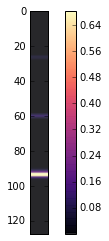

In [8]:
plt.imshow(e1, aspect='.10',cmap='magma',alpha=0.85)
plt.colorbar()
plt.xticks([])
plt.show()

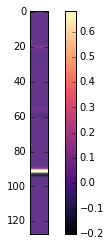

In [9]:
plt.imshow(e2, aspect='.10',cmap='magma',alpha=0.85)
plt.colorbar()
plt.xticks([])
plt.show()

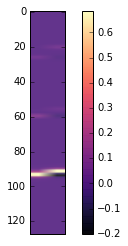

In [10]:
plt.imshow(np.column_stack((e1,e2)),cmap='magma', aspect='0.1',alpha=0.85)
plt.colorbar()
plt.xticks([])
plt.show()

## 3.4

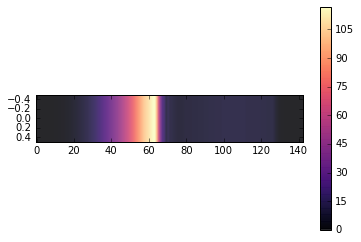

In [12]:
#First Activation
FA = np.dot(e1.T, nodes)
plt.imshow(FA, cmap='magma', alpha=0.85, aspect='25')
plt.colorbar()
plt.show()

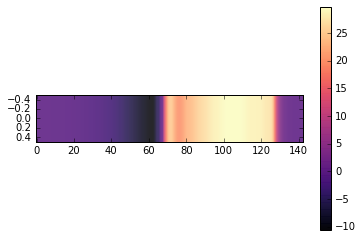

In [13]:
#Second Activation
SA = np.dot(e2.T, nodes)
plt.imshow(SA, cmap='magma', alpha=0.85, aspect='25')
plt.colorbar()
plt.show()

## 3.5

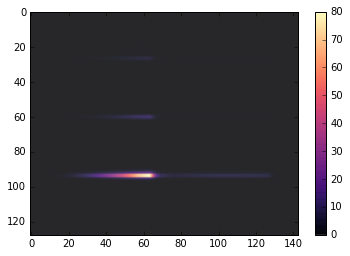

In [16]:
#First Note Recovery
FN = np.dot(e1,FA)
plt.imshow(FN, cmap='magma', alpha=0.85, aspect='auto')
plt.colorbar()
plt.show()

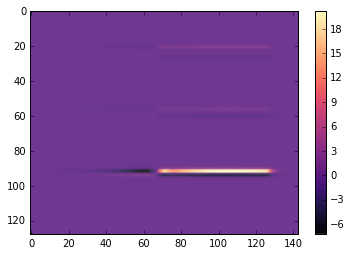

In [17]:
#Second Note Recovery
SN = np.dot(e2,SA)
plt.imshow(SN, cmap='magma', alpha=0.85, aspect='auto')
plt.colorbar()
plt.show()

# 4. BFGS

In [3]:
target = image.imread("sg_train.jpg")
noisy_img = image.imread("sgx_train.jpg")
test_img = image.imread("sgx_test.jpg")


In [74]:
def g(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = 1/(1+np.exp(-x[i][j]))
    return x

def h(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = np.exp(-x[i][j])/(1 + np.exp(-x[i][j]))**2
    return x

def generate_image(img,x):
    #denoised_image = np.dot(img.T,x)
    denoised_image = np.reshape(np.dot(img.T,x),(197,197))
    return denoised_image

def denoising(target, noisy, pix_length):
    #sg_train = image.imread("sg_train.jpg")
    #sgx_train = image.imread("sgx_train.jpg")
    width = noisy.shape[0]
    height = noisy.shape[1]
    pix_length = 3
    denoising_filter = np.random.uniform(0.0,1.0,(pix_length, pix_length)) 
    #denoising_filter = denoising_filter/100.0
    img = []
    
    for i in range(width-pix_length):
        x = []
        for j in range(height-pix_length):          
            x = noisy[i:i+pix_length, j: j+pix_length].reshape(-1).tolist()
            img.append(x)
            
    print ("Length: ",len(img))
    img = (np.array(img)).T
    
    ###
    denoising_filter = np.reshape(np.ravel(denoising_filter), (9,1))
    denoised_image = np.ones((197, 197))
    
    for i in range( width-3):
        for j in range(height-3):
            denoised_image[i][j] = target[i][j]
    
    newImage = generate_image(denoising_filter,img)
    
    denoised_g_st = g(denoised_image)
    error_func = []
    for i in range(1000):
        alpha = 0.1
        #print (newImage.shape)
        G = g(newImage)
        #print (G.shape)
        
        GDash = h(newImage)
        #print (GDash.shape)
        
        ElementWiseProduct = (np.multiply((denoised_image  - G),GDash)).T
        #print (ElementWiseProduct.shape)
        ElementWiseProduct = np.reshape(np.ravel(ElementWiseProduct), (38809, 1))
        #print (ElementWiseProduct.shape)
        img1 = (2/(38809))*img
        delta = np.dot(img1,ElementWiseProduct)
        #print (img1.shape)
        #print(delta.shape)
        #print(denoising_filter.shape)
        denoising_filter = denoising_filter + (alpha * delta)
    
        newImage = generate_image(denoising_filter,img1)
        
        convergence_value = (denoised_g_st-G)
        convergence_value = (np.reshape(np.ravel(convergence_value), (38809, 1)))
        #print (convergence_value.shape)
        convergence_limiter = 1/(np.dot(convergence_value.T,convergence_value))
        #print (type((convergence_limiter).tolist()[0][0]))
        error_func.append((convergence_limiter).tolist()[0][0])
    #plt.imshow(newImage, interpolation='nearest')
    plt.imshow(newImage)
    plt.gray()
    plt.savefig('train1.jpg')
    #plt.close(fig)
    plt.show()
    
    plt.plot(error_func)
    plt.xlabel('Iterations', fontsize=18)
    plt.ylabel('Error', fontsize=18)
    plt.savefig('graph.jpg')
    plt.show()

Length:  38809


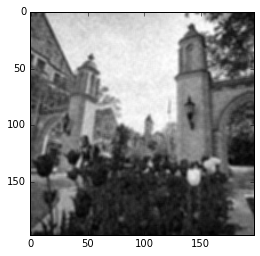

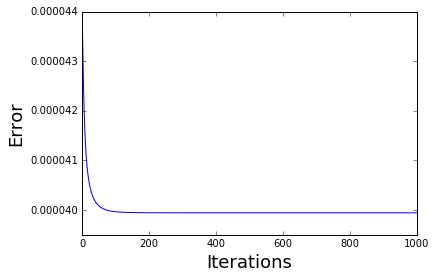

In [75]:
pix_length = 3
denoising(target, noisy_img, pix_length)

Length:  38809


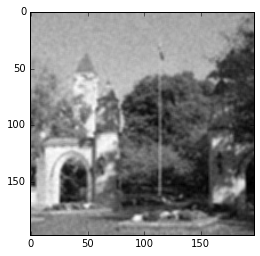

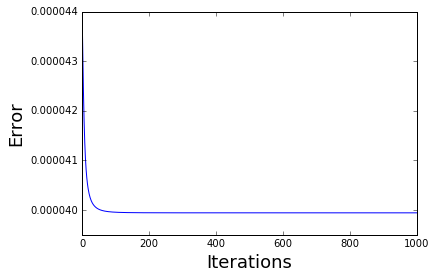

In [76]:
pix_length = 3
denoising(target, test_img, pix_length)

In [86]:
from scipy.special import logit
def g(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = 1/(1+np.exp(-x[i][j]))
    return x

def h(x):
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] = np.exp(-x[i][j])/(1 + np.exp(-x[i][j]))**2
    return x

def first_term(p,v):
    
    return (np.divide((np.dot(p,p.T)), np.dot(p.T, v)))
    

def second_term(G,v):
    
    numerator = np.dot(np.dot(np.dot(G,v),v.T), G)
    denominator = np.dot(np.dot(v.T, G), v)
    
    return (np.divide(numerator, denominator))
    
    
def third_term(G,v,u):
    
    #print (type(u),type(v),type(G))
    #print ("U: ", u.shape, "V: ", v.shape, "Gi: ", G.shape)
    return ((np.dot(np.dot(v.T,G),v))*(np.dot(u,u.T)))

def U(p,v,G):
    
    first = np.divide(p, np.dot(p.T,v)) 
    #print ("P",p)
    #print ("first",first)
    second = np.divide(np.dot(G,v), np.dot(np.dot(v.T,G),v)) 
    
    return (first-second)

def generate_image(filt,x):
    #denoised_image = np.dot(img.T,x)
    denoised_image = np.reshape(np.dot(filt.T,x),(197,197))
    return denoised_image


def denoising_bfgs(target, noisy, pix_length):
    #sg_train = image.imread("sg_train.jpg")
    #sgx_train = image.imread("sgx_train.jpg")
    width = noisy.shape[0]
    height = noisy.shape[1]
    #pix_length = 3
    
    #F(i)
    denoising_filter_previous = np.random.uniform(0.0,1.0,(pix_length, pix_length)) 
    #denoising_filter = denoising_filter/100.0
    img = []
    
    for i in range(width-pix_length):
        x = []
        for j in range(height-pix_length):          
            x = noisy[i:i+pix_length, j: j+pix_length].reshape(-1).tolist()
            img.append(x)
            
    print ("Length: ",len(img))
    img = (np.array(img)).T
    
    ###
    denoising_filter_previous = np.reshape(np.ravel(denoising_filter_previous), (9,1))
    denoised_image = np.ones((197, 197))
    
    for i in range( width-3):
        for j in range(height-3):
            denoised_image[i][j] = target[i][j]
    
    
    newImage = generate_image(denoising_filter_previous,img)
    
    #denoised_g_st = g(denoised_image)
    
    
    #Initialize G
    Gi = np.identity(9)
    
    #First Iteration outside loop
    alpha = 0.1
    G = g(newImage)
    GDash = h(newImage)
    ElementWiseProduct = (np.multiply(( - G),GDash)).T
    ElementWiseProduct = np.reshape(np.ravel(ElementWiseProduct), (38809, 1))
    img1 = (2/(38809))*img
    
    # Delta(Fi)
    delta_previous = np.dot(img1,ElementWiseProduct)
    
    #F(i+1)
    denoising_filter = denoising_filter_previous + (alpha * delta_previous) 
    
    newImage = generate_image(denoising_filter,img1) 
    
    denoised_g_st = g(denoised_image)
    error_func = []
    
    for i in range(7):
        alpha = 0.1
        #print (newImage.shape)
        
        G = g(newImage)
        GDash = h(newImage)
        ElementWiseProduct = (np.multiply((denoised_image  - G),GDash)).T
        ElementWiseProduct = np.reshape(np.ravel(ElementWiseProduct), (38809, 1))
        img1 = (2/(38809))*img
        
        
        # Delta(Fi+1)
        delta = np.dot(img1,ElementWiseProduct)

        #P
        p = denoising_filter - denoising_filter_previous
        
        #V
        v = delta - delta_previous
        #print ("V",v)
        
        #U
        u = U(p,v,Gi)
        #print ("U",u)
        
        #Update Gi
        Gi = Gi + first_term(p,v) + second_term(Gi,v) + third_term(Gi,v,u)
        
        Gi = alpha*Gi
        #print (Gi)
        
        #SWAP
        denoising_filter_previous = denoising_filter
        
        
        denoising_filter = denoising_filter_previous - np.dot(Gi,delta_previous)
        newImage = generate_image(denoising_filter,img1)
        
        #SWAP
        delta_previous = delta
        
        convergence_value = (denoised_g_st-G)
        convergence_value = (np.reshape(np.ravel(convergence_value), (38809, 1)))
        #print (convergence_value.shape)
        convergence_limiter = 1/(np.dot(convergence_value.T,convergence_value))
        #print (type((convergence_limiter).tolist()[0][0]))
        error_func.append((convergence_limiter).tolist()[0][0])
        
    #plt.imshow(newImage, interpolation='nearest')
    plt.imshow(newImage)
    plt.gray()
    plt.savefig('train1.jpg')
    #plt.close(fig)
    plt.show()
    
    plt.plot(error_func)
    plt.xlabel('Iterations', fontsize=18)
    plt.ylabel('Error', fontsize=18)
    plt.savefig('graph2.jpg')
    plt.show()

Length:  38809


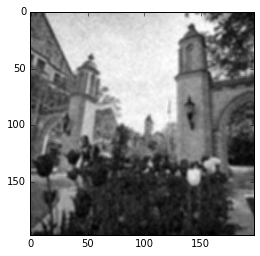

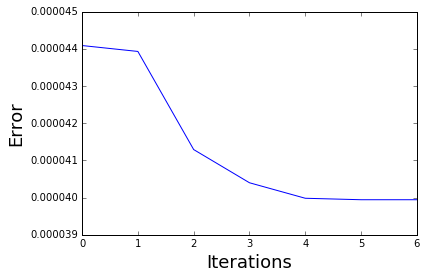

In [87]:
pix_length = 3
denoising_bfgs(target, noisy_img, pix_length)

Length:  38809


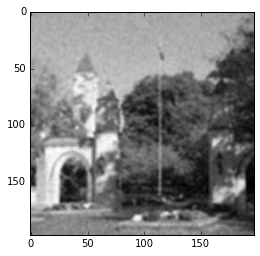

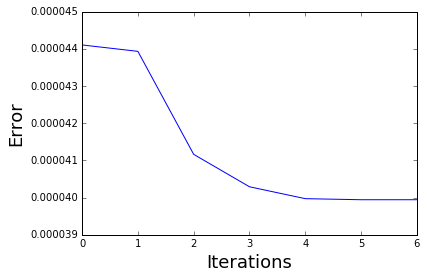

In [81]:
pix_length = 3
denoising_bfgs(target, test_img, pix_length)